# Network Modelling

This notebook shows how to create different network models with a special focus on Two-Mode (Bipartite network) to One-Mode transformation

In [3]:
import os
import sys
import networkx as nx
from networkx.algorithms import bipartite

Use helper methods defined in src folder:

In [5]:
module_path = os.path.abspath(os.path.join('../../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [6]:
from graphutil.visualization import draw_emphasizing_edge_weight
from graphutil.print import print_edge_attribute_desc, print_edges_with_attributes, print_network_information

## One-Mode Networks

### Simple One-Mode Network (undirected and directed)
A simple One-Mode network (all nodes are the same type, e.g. People, Websites and also all edges have the same meaning (e.g. "talks to"))

Self-Loops are allowed, parallel edges not.

In [9]:
# Undirected graph
G = nx.Graph(name ="One-Mode Undirected")
nodes = ['A', 'B', 'C', 'D', 'E', 'F']
edges = [('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'),
         ('B', 'D'), ('C', 'D'), ('D', 'E'), ('D', 'F'), ('E', 'F')]
G.add_nodes_from(nodes)
G.add_edges_from(edges)

print_network_information(G)

Information for given Graph with name 'One-Mode Undirected':
	Graph is directed: False
	Number of nodes: 6
	Number of edges: 9


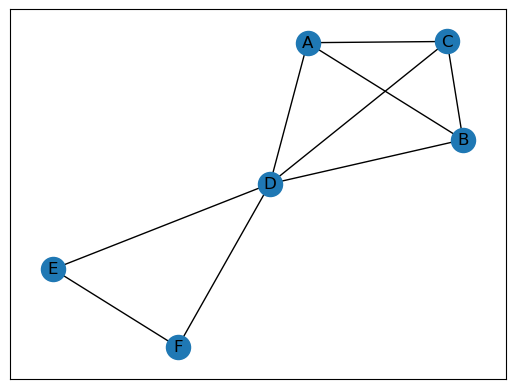

In [10]:
nx.draw_networkx(G)

In [11]:
# Directed Graph
G = nx.DiGraph(name ="One-Mode Directed")
nodes = ['A', 'B', 'C', 'D', 'E', 'F']
edges = [('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'),
         ('B', 'D'), ('C', 'D'), ('D', 'E'), ('D', 'F'), ('E', 'F')]
G.add_nodes_from(nodes)
G.add_edges_from(edges)

print_network_information(G)

Information for given Graph with name 'One-Mode Directed':
	Graph is directed: True
	Number of nodes: 6
	Number of edges: 9


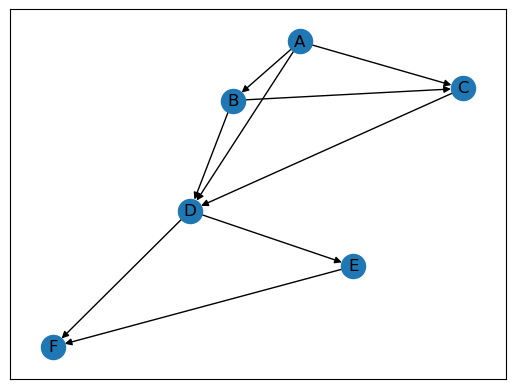

In [12]:
nx.draw_networkx(G)

### One-Mode (MultiGraph)
One-Mode network (all nodes are the same type) but is able to keep multiple edges types.

Parallel edges are allowed.

**Pay attention:**
- Most algorithms so not distinguish different edge types. It's recommended to read the documentation or filter edges in advance.
- Bipartite algorithms are not imported in the networkx top level namespace. Import those using: ``from networkx.algorithms import bipartite``


In [14]:
G = nx.MultiGraph()
nodes = ['A', 'B']
edges = [('A', 'B', {"mail":"E-Mail 1"}), 
         ('A', 'B', {"mail":"E-Mail 2"}), 
         ('A', 'B', {"tel":"Talk"}) ]
G.add_nodes_from(nodes)
G.add_edges_from(edges)

print_network_information(G)

Information for given Graph with name '':
	Graph is directed: False
	Number of nodes: 2
	Number of edges: 3


In [15]:
print_edges_with_attributes(G)

('A', 'B', {'mail': 'E-Mail 1'})
('A', 'B', {'mail': 'E-Mail 2'})
('A', 'B', {'tel': 'Talk'})


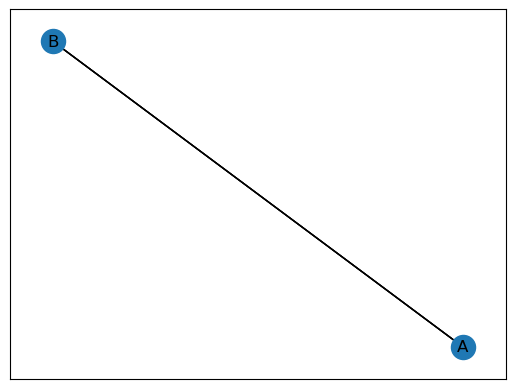

In [16]:
nx.draw_networkx(G)

## Two-Mode Networks
Two-Mode networks (aka Bipartite graphs) have two node sets and edges that only connect nodes from opposite sets.

**Most algorithms are only defined for One-Mode networks.** There are different ways to transform Two-mode networks to one mode networks.

In general, it's recommended to add some 'type' node attribute to clearly identify the different node classes, but it's not required (as shown here).

In our example nodes with capital letters are people and nodes with numbers are events. The edge defines that a person attended the event.

In [18]:
G = nx.Graph(name="Bipartite Graph")
people_nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
event_nodes = ['1', '2', '3']
edges = [('A', '1'), ('B', '1'), ('C', '1'), ('D', '1'), ('E', '1'), ('F', '1'), 
        ('E', '2'), ('F', '2'), ('G', '2'), ('H', '2'), 
        ('F', '3'), ('H', '3')]
G.add_nodes_from(people_nodes)
G.add_nodes_from(event_nodes)
G.add_edges_from(edges)

print_network_information(G)

Information for given Graph with name 'Bipartite Graph':
	Graph is directed: False
	Number of nodes: 11
	Number of edges: 12


Checking whether our graph is bipartite (= Two Mode) and read the two node sets:

In [20]:
print(f"Is the graph bipartite? {nx.is_bipartite(G)}")

Is the graph bipartite? True


In [21]:
first_group, second_group = bipartite.sets(G)
print(f"First Group: {first_group},\nSecond Group: {second_group}")

First Group: {'E', 'A', 'H', 'D', 'G', 'C', 'B', 'F'},
Second Group: {'1', '2', '3'}


{'A': Text(-0.21631652864911802, 0.9857779502760792, 'A'),
 'B': Text(0.1945689395318737, 0.8048843630507059, 'B'),
 'C': Text(-0.7254754465734302, 0.3634055636117218, 'C'),
 'D': Text(-0.6124219156649163, 0.7987337795990795, 'D'),
 'E': Text(0.24558331629786948, 0.020272322604488458, 'E'),
 'F': Text(-0.06618184353470095, -0.2771090563424974, 'F'),
 'G': Text(0.8940731587581778, -0.774890039803913, 'G'),
 'H': Text(0.21772340083256586, -0.9999999999999999, 'H'),
 '1': Text(-0.1919844827142055, 0.4242885340748738, '1'),
 '2': Text(0.40523902727774674, -0.5316020396521588, '2'),
 '3': Text(-0.14480762556186233, -0.8137613774183794, '3')}

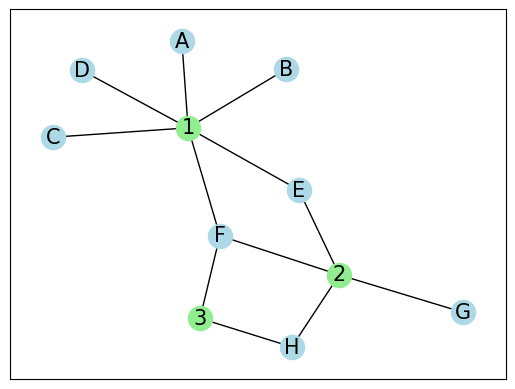

In [22]:
pos = nx.drawing.layout.spring_layout(G, seed = 42)

nx.draw_networkx_nodes(G, pos, nodelist=first_group, node_color="lightblue")                                                                                                        
nx.draw_networkx_nodes(G, pos, nodelist=second_group, node_color="lightgreen")                                                                                                        
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=15, font_family='sans-serif')

## Two-Mode to One-Mode Projections

### Simple projection
All people attending an event are connected to each other in the projected network.

In [25]:
simple_projection = bipartite.projected_graph(G, first_group)
print(f"Nodes: {simple_projection.nodes()}")
print(f"Edges: {simple_projection.edges(data=True)}")
print("")
print_network_information(simple_projection)

Nodes: ['E', 'A', 'H', 'D', 'G', 'C', 'B', 'F']
Edges: [('E', 'A', {}), ('E', 'H', {}), ('E', 'D', {}), ('E', 'G', {}), ('E', 'C', {}), ('E', 'B', {}), ('E', 'F', {}), ('A', 'D', {}), ('A', 'C', {}), ('A', 'B', {}), ('A', 'F', {}), ('H', 'G', {}), ('H', 'F', {}), ('D', 'C', {}), ('D', 'B', {}), ('D', 'F', {}), ('G', 'F', {}), ('C', 'B', {}), ('C', 'F', {}), ('B', 'F', {})]

Information for given Graph with name 'Bipartite Graph':
	Graph is directed: False
	Number of nodes: 8
	Number of edges: 20


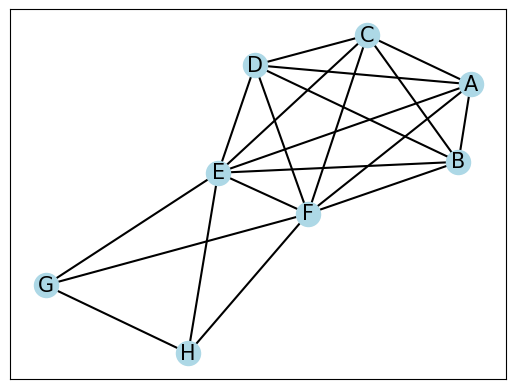

In [26]:
draw_emphasizing_edge_weight(simple_projection)

### Weighted Projection
Edge weight according number of commonly attended events (absolute or relative)

In [28]:
weighted_projection = bipartite.weighted_projected_graph(G, first_group)
print_edge_attribute_desc(weighted_projection)

Edges descending order according weight attribute (limit: -1):
('E', 'F', 2)
('H', 'F', 2)
('E', 'A', 1)
('E', 'H', 1)
('E', 'D', 1)
('E', 'G', 1)
('E', 'C', 1)
('E', 'B', 1)
('A', 'D', 1)
('A', 'C', 1)
('A', 'B', 1)
('A', 'F', 1)
('H', 'G', 1)
('D', 'C', 1)
('D', 'B', 1)
('D', 'F', 1)
('G', 'F', 1)
('C', 'B', 1)
('C', 'F', 1)
('B', 'F', 1)


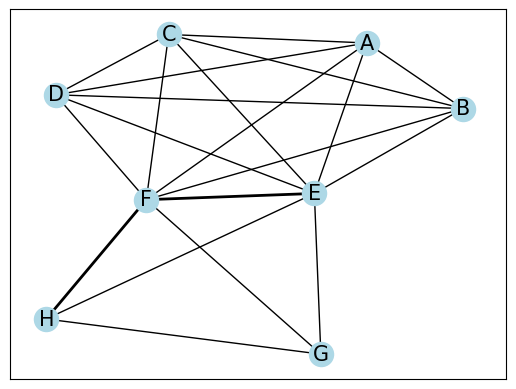

In [29]:
draw_emphasizing_edge_weight(weighted_projection)

### Newman’s Weighted Projection» für Kollaborations-Netzwerke

See: [Collaboration Weighted Projected Network](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.bipartite.projection.collaboration_weighted_projected_graph.html#networkx.algorithms.bipartite.projection.collaboration_weighted_projected_graph)

In [31]:
newman_weighted_projection = bipartite.collaboration_weighted_projected_graph(G, first_group)
print_edge_attribute_desc(newman_weighted_projection)

Edges descending order according weight attribute (limit: -1):
('H', 'F', 1.3333333333333333)
('E', 'F', 0.5333333333333333)
('E', 'H', 0.3333333333333333)
('E', 'G', 0.3333333333333333)
('H', 'G', 0.3333333333333333)
('G', 'F', 0.3333333333333333)
('E', 'A', 0.2)
('E', 'D', 0.2)
('E', 'C', 0.2)
('E', 'B', 0.2)
('A', 'D', 0.2)
('A', 'C', 0.2)
('A', 'B', 0.2)
('A', 'F', 0.2)
('D', 'C', 0.2)
('D', 'B', 0.2)
('D', 'F', 0.2)
('C', 'B', 0.2)
('C', 'F', 0.2)
('B', 'F', 0.2)


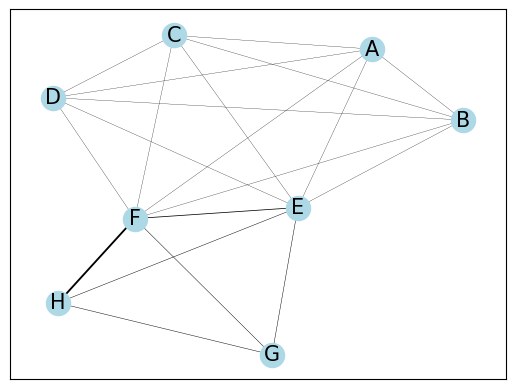

In [32]:
draw_emphasizing_edge_weight(newman_weighted_projection)


### Overlap Projection

In [34]:
overlap_projection = bipartite.overlap_weighted_projected_graph(G, first_group)
print_edge_attribute_desc(overlap_projection)

Edges descending order according weight attribute (limit: -1):
('A', 'D', 1.0)
('A', 'C', 1.0)
('A', 'B', 1.0)
('D', 'C', 1.0)
('D', 'B', 1.0)
('C', 'B', 1.0)
('E', 'F', 0.6666666666666666)
('H', 'F', 0.6666666666666666)
('E', 'A', 0.5)
('E', 'D', 0.5)
('E', 'G', 0.5)
('E', 'C', 0.5)
('E', 'B', 0.5)
('H', 'G', 0.5)
('E', 'H', 0.3333333333333333)
('A', 'F', 0.3333333333333333)
('D', 'F', 0.3333333333333333)
('G', 'F', 0.3333333333333333)
('C', 'F', 0.3333333333333333)
('B', 'F', 0.3333333333333333)


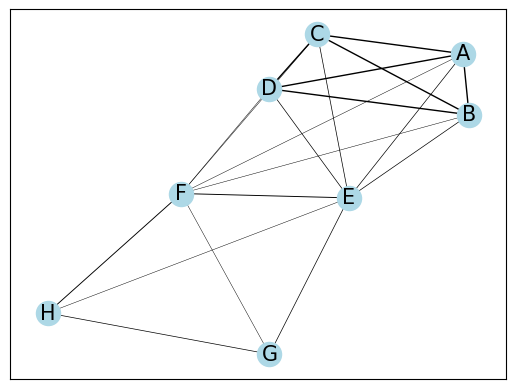

In [35]:
draw_emphasizing_edge_weight(overlap_projection)